<a href="https://colab.research.google.com/github/Teasotea/BioNER-and-RD/blob/main/RD_KG_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import io
import os

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer as twt
import spacy
from spacy import displacy

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 

In [ ]:
import pickle
from google.colab import files

In [ ]:
import bs4
import requests
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('punkt')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .
import os
os.chdir("bert-sklearn")
print(os.listdir())

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 3.94 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bert-sklearn/bert-sklearn/bert-sklearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-py3-none-any.whl size=54247 sha256=51ed7ad7c52bf62f8b6e27a3ef752ac7ee7f1c9a0b967d3af60f27829d3d519e
  Stored in directory: /root/.cache/pip/wh

In [ ]:
# !pip install --upgrade sagemaker

In [ ]:
from bert_sklearn import BertTokenClassifier
from bert_sklearn import load_model

In [ ]:
# !nvidia-smi

In [ ]:
import torch
print('pytorch version:', torch.__version__)
# print('GPU:',torch.cuda.get_device_name(0))

pytorch version: 1.11.0+cu113


In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]

# Load Data

In [ ]:
with open('/content/data0.txt') as f:
      eval_article = f.read()

In [ ]:
data = pd.DataFrame()
data['paragraphs'] = eval_article.split('\n')
data['tokenized'] = data['paragraphs'].apply(lambda x:list(twt().tokenize(x)))
data.head()

,paragraphs,tokenized
0,Transductional analysis was applied to the Pseudomonas aeruginosa mutant PAO14 (hnc-1). This mutant can utilize L-histidinol as sole source of carbon and nitrogen and has a 60-fold increased histi...,"[Transductional, analysis, was, applied, to, the, Pseudomonas, aeruginosa, mutant, PAO14, (, hnc-1, ), ., This, mutant, can, utilize, L-histidinol, as, sole, source, of, carbon, and, nitrogen, and..."
1,"Bacteriocins produced by six strains of Rhizobium trifolii were found to be of the relatively low molecular weight, non-phage type. The molecular weights ranged from approximately 1-8 X 105 to 2-0...","[Bacteriocins, produced, by, six, strains, of, Rhizobium, trifolii, were, found, to, be, of, the, relatively, low, molecular, weight, ,, non-phage, type., The, molecular, weights, ranged, from, ap..."
2,The gamma haemolysin of Staphylococcus aureus \'Smith 5R\' was produced on Dolman-Wilson agar overlain with cellophane. Maximal yields of crude lysin with titres of 2000 to 4000 haemolytic units/m...,"[The, gamma, haemolysin, of, Staphylococcus, aureus, \'Smith, 5R\, ', was, produced, on, Dolman-Wilson, agar, overlain, with, cellophane., Maximal, yields, of, crude, lysin, with, titres, of, 2000..."
3,"Arginine and methionine transport by Aspergillus nidulans mycelium was investigated. A single uptake system is responsible for the transport of arginine, lysine and ornithine. Transport is energy-...","[Arginine, and, methionine, transport, by, Aspergillus, nidulans, mycelium, was, investigated., A, single, uptake, system, is, responsible, for, the, transport, of, arginine, ,, lysine, and, ornit..."
4,"Aphids transmitted poly-L-ornithine (PLO)-treated tobacco mosaic virus (TMV) when given acquistion and inoculation access periods as brief as 30 s and 2 min, respectively; the ability to transmit ...","[Aphids, transmitted, poly-L-ornithine, (, PLO, ), -treated, tobacco, mosaic, virus, (, TMV, ), when, given, acquistion, and, inoculation, access, periods, as, brief, as, 30, s, and, 2, min, ,, re..."


# Load NER Model

In [ ]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

scibert_model = CPU_Unpickler(open('/content/scibert_model.pkl', 'rb')).load() #for cpu

In [ ]:

#pickled_model =  pickle.load(open('/content/scibert_model.pkl', 'rb')) #for gpu

# Extract entity candidates and relations




In [ ]:
data_named_entities = scibert_model.predict(data['tokenized'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
print(data_named_entities[4])

['O', 'O', 'B-Chemical', 'O', 'B-Chemical', 'O', 'O', 'B-Disease', 'I-Disease', 'I-Disease', 'O', 'B-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'I-Chemical', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'B-Disease', 'O', 'O', 'O', 'B-Disease', 'I-Disease', 'O', 'B-Chemical', 'B-Disease', 'O', 'O', 'O', 'O'

# Entity extraction

In [ ]:
def extract_entities_from_string(string):
  tokenized = list(twt().tokenize(string))
  preds = scibert_model.predict(pd.Series([tokenized]))[0]
  entities = []
  for i, j in zip(tokenized, preds):
    if j!= 'O':
      entities.append(i)
  return list(set(entities))

In [ ]:
extract_entities_from_string(data['paragraphs'].iloc[4])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

['tobacco',
 'TMV',
 'polyamino',
 'KCl',
 'acid',
 'PLO',
 'potato',
 'mosaic',
 'poly-L-ornithine',
 'virus',
 'poly-L-lysine',
 'PLO-treated',
 'rattle']

In [ ]:
def isNotStopWord(word):
    return word not in stopwords.words('english')

def preprocess(sent):
  sent = re.sub("[\(\[].*?[\)\]]", "", sent)
  tokens = []
  temp = ""
  words = word_tokenize(sent)
  punctuations = '"#$%&\'()*+,-/:;<=>@\\^_`{|}~'
  words = map(lambda x: x.translate(str.maketrans('','',punctuations)), words)
  
  words = map(str.lower,words)
  words = filter(lambda x: isNotStopWord(x),words)
  tokens = tokens + list(words)
  temp = ' '.join(word for word in tokens)
  return temp

In [ ]:
data['preprocessed'] = data['paragraphs'].apply(lambda x: preprocess(x))

In [ ]:
def get_entity(sent):
  ent1 = "" 
  ent2 = "" 

  prev_token_text = "" 
  prev_token_dep = "" 

  prefix = ""
  modifier = ""

  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prev_token_dep == "compound":
          prefix = prev_token_text + " "+ prefix
      if tok.dep_.endswith("mod")==True:
        modifier = tok.text 
        if prev_token_dep == "compound":
          modifier = prev_token_text + " " + modifier

      if tok.dep_.find("subj") == True:
        ent1 =modifier+ " " + prefix + " " + tok.text
        prefix = ""
        modifer = ""
      if tok.dep_.find("obj") == True:
        ent2 =modifier+ " " + prefix + " " + tok.text
        prefix = ""
        modifer = ""

      prev_token_text = tok.text
      prev_token_dep = tok.dep_

  return [ent1.strip(), ent2.strip()]

In [ ]:
[ent1,ent2] = get_entity("Transductional analysis was applied to the Pseudomonas aeruginosa mutant PAO14 (hnc-1).")
print("Subj : {a}, obj : {b}".format(a = ent1, b = ent2))
get_entity("Transductional analysis was applied to the Pseudomonas aeruginosa mutant PAO14 (hnc-1).")

Subj : Transductional  analysis, obj : Transductional aeruginosa mutant PAO14


['Transductional  analysis', 'Transductional aeruginosa mutant PAO14']

In [ ]:
data['entity_pairs']= data['preprocessed'].apply(lambda x: [get_entity(i) for i in x.split('. ')])

In [ ]:
def get_relation(sent):
  matcher = Matcher(nlp.vocab)
  patterns = [[{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}]]

  matcher.add("matching_1", patterns) 
  doc = nlp(sent)
  matches = matcher(doc)
  if len(matches)>0:
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 
  else: return None
  return(span.text)

In [ ]:
get_entity("Transductional analysis was applied to the Pseudomonas aeruginosa mutant PAO14 (hnc-1)."), get_relation("Transductional analysis was applied to the Pseudomonas aeruginosa mutant PAO14 (hnc-1).")

(['Transductional  analysis', 'Transductional aeruginosa mutant PAO14'],
 'applied to')

In [ ]:
data['relations'] = data['preprocessed'].apply(lambda x: [get_relation(i) for i in x.split('. ')])

In [ ]:
entity_pairs = flatten(data['entity_pairs'].tolist())
relations = flatten(data['relations'].tolist())

In [ ]:
subjects = [x[0] for x in entity_pairs]
objects = [x[1] for x in entity_pairs]

In [ ]:
pd.Series(subjects).value_counts()[:20]

                                          196
results                                     6
effects                                     3
transductional  analysis                    2
specific  activity                          2
adenyl cyclase activity                     2
antigenic  group                            2
intravenous kcn doxapram hydrochloride      2
findings                                    2
authors                                     2
cells                                       2
activity                                    2
enzymatic  activity                         2
level                                       2
receptors                                   2
data                                        2
values                                      2
pentagastrin                                2
premature  decline                          1
recovery function                           1
dtype: int64

In [ ]:
entity_pairs2 = entity_pairs
relations2 = relations
entity_pairs3 = []
relations3 = []
for i in tqdm(range(len(entity_pairs2))):
  if entity_pairs2[i][0]!='' and entity_pairs2[i][1]!='':
    entity_pairs3.append(entity_pairs2[i])
    relations3.append(relations2[i])
tqdm._instances.clear()

100%|██████████| 824/824 [00:00<00:00, 341917.94it/s]


In [ ]:
sample_sent = 'Australia, Arginine and methionine transport by Aspergillus nidulans mycelium was investigated. A single uptake system is responsible for the transport of arginine, lysine and ornithine'
nlp_ents = nlp(sample_sent).ents # tuple
[str(word) for word in nlp_ents] #list of words

['Australia', 'Arginine', 'Aspergillus']

In [ ]:
extract_entities_from_string(sample_sent)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

['Arginine', 'ornithine', 'arginine', 'methionine', 'lysine']

In [ ]:
extract_entities_from_string(entity_pairs[50][1])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

['hypertension', 'hyperventilation']

# Constructing e1-rel-e2 triples for building Knowledge Graps

In [ ]:
def extract_entities_from_pairs(pairs):
  pairs_df = pd.DataFrame(pairs, columns = ["source", "target"])
  pairs_df["tok_source"] = pairs_df["source"].apply(lambda x: list(twt().tokenize(x)))
  pairs_df["tok_target"] = pairs_df["target"].apply(lambda x: list(twt().tokenize(x)))

  pairs_df["ner_source"] = scibert_model.predict(pairs_df["tok_source"])
  pairs_df["ner_target"] = scibert_model.predict(pairs_df["tok_target"])

  def extract_words(tok, ner):
    word_list = []
    for i,j in zip(tok,ner):
      if j!= 'O':
        word_list.append(i)
    if len(word_list)==0:
      return None
    else: return word_list
  pairs_df['source+ner'] = pairs_df.apply(lambda x: extract_words(x['tok_source'],x['ner_source']), axis=1)
  pairs_df['target+ner'] = pairs_df.apply(lambda x: extract_words(x['tok_target'],x['ner_target']), axis=1)
  return pairs_df

In [ ]:
pair_df = extract_entities_from_pairs(entity_pairs)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/52 [00:00<?, ?it/s]

Predicting:   0%|          | 0/52 [00:00<?, ?it/s]

In [ ]:
pair_df['relations'] = relations

In [ ]:
pair_df

,source,target,tok_source,tok_target,ner_source,ner_target,source+ner,target+ner,relations
0,transductional analysis,transductional aeruginosa mutant pao14,"[transductional, analysis]","[transductional, aeruginosa, mutant, pao14]","[O, O]","[O, O, O, O]",None,None,applied
1,sole 60fold,histidinol dehydrogenase content,"[sole, 60fold]","[histidinol, dehydrogenase, content]","[O, O]","[O, O, O]",None,None,utilize
2,transductional analysis,structural hnc1 locus genes,"[transductional, analysis]","[structural, hnc1, locus, genes]","[O, O]","[O, O, O, O]",None,None,see
3,cotransduced iv,structural 97 gene,"[cotransduced, iv]","[structural, 97, gene]","[O, O]","[O, O, O]",None,None,genes
4,data,structural data hnc1 gene,[data],"[structural, data, hnc1, gene]",[O],"[O, O, O, O]",None,None,obtained
...,...,...,...,...,...,...,...,...,...
819,diamide cystamine nano2,acidsoluble thiol content heart,"[diamide, cystamine, nano2]","[acidsoluble, thiol, content, heart]","[O, B-Chemical, O]","[O, O, O, O]",[cystamine],None,decreased acidsoluble
820,compounds,,[compounds],[],[O],[O],None,None,None
821,,probably catecholamines,[],"[probably, catecholamines]",[O],"[O, O]",None,None,conclude
822,,coronary vessels,[],"[coronary, vessels]",[O],"[O, O]",None,None,decrease coronary


In [ ]:
relation_df = pair_df[['tok_source','tok_target','ner_source','ner_target','source+ner','relations', 'target+ner']].dropna().reset_index(drop=True)
relation_df.to_csv('relation_pairs.csv', index = False)

In [ ]:
ner_pair_df = pair_df[['source+ner','relations','target+ner']]
ner_pair_df = ner_pair_df.dropna().reset_index(drop=True)

In [ ]:
ner_pair_df = ner_pair_df.rename(columns={'source+ner':'source', 'relations':'relation','target+ner':'target' }).drop_duplicates().reset_index(drop=True)
ner_pair_df['source'] = ner_pair_df['source'].apply(lambda x: ''.join(x))
ner_pair_df['target'] = ner_pair_df['target'].apply(lambda x: ''.join(x))
ner_pair_df

,source,relation,target
0,cholicacid,fed,glutathione
1,noradrenaline,determined,noradrenalinepancuronium14cna
2,glycine,heated,imidazoleglynpa
3,leukemic,treated,leukemic
4,alphaketobetamethylvalericacid,raised,amino
5,ammonia,effects,ammonia
6,choline,observed,acidosis
7,doxapramhydrochloride,studied anesthetized,normothermia
8,organophosphate,increases,organophosphate
9,coronaryheart,decreased oral,propranolol


In [ ]:
ner_pair_df.to_csv('/content/relations1.tsv', sep="\t")

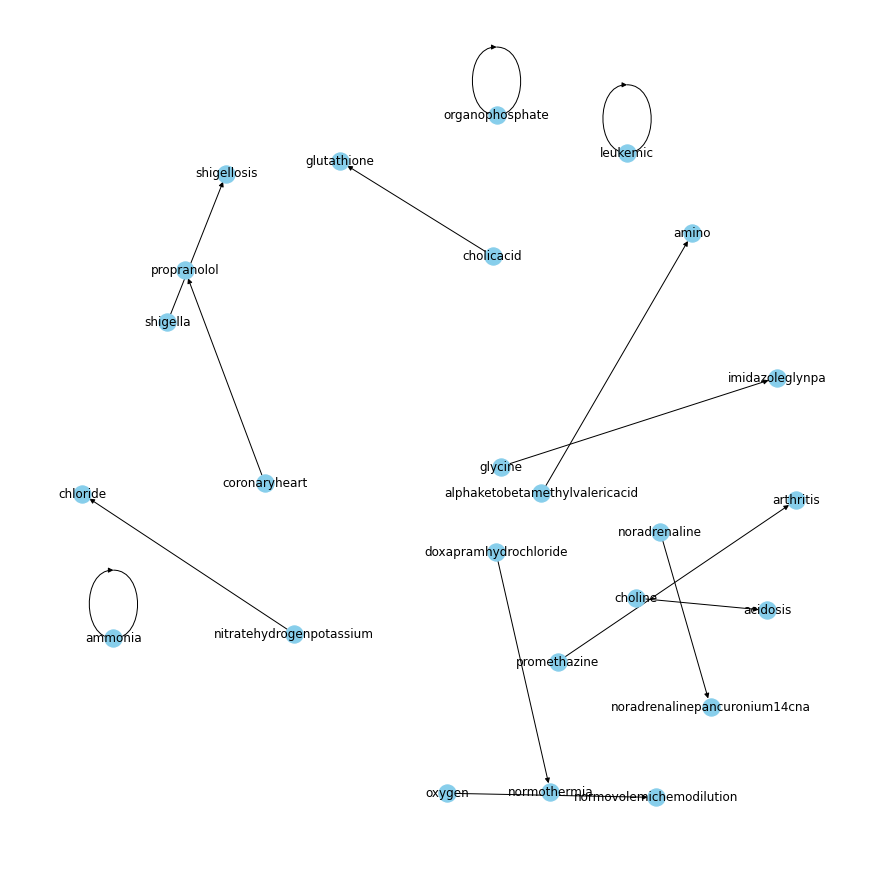

In [ ]:
plt.figure(figsize=(12,12))
G=nx.from_pandas_edgelist(ner_pair_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
pos = nx.spring_layout(G, k = 0.7)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()